# PREDICTING A PULSAR STAR

# Abstract


Data set Used: HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey.Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve.

This notebook mainly includes the comparison of algorithms which predicts whether the given point is a pulsar star or not. The steps followed are: 

1.  Importing necessary packages
2.  Data Preprocessing: dealing with the missing values, converting variables to categorical variables
3.  Checking correlation between fields
4.  Splitting data into separate training and test set 
5.  Feature Scaling
6.  SVM
7.  Confusion Matrix 
8.  KNN
9.  Random Forest Classifier
10. Model Comparision
11. Answers of the questions
12. Conclusion
13. Citations
14. License

# 1. Importing necessary packages

In [0]:
import pandas as pd
import matplotlib.pyplot as plt    
import seaborn as sns              
%matplotlib inline

In [0]:
df = pd.read_csv("C:\\Users\\tejas\\Desktop\\ADS\\Assignments\\Assignment 1\\predicting-a-pulsar-star\\pulsar_stars.csv")

In [0]:
df.shape

(17898, 9)

In [0]:
df.head(5)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [0]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [0]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

renaming the columns 

In [0]:
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

# 2. Data Preprocessing: dealing with the missing values, converting variables to categorical variables

Explore missing values in variables

In [0]:
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
IP Mean            17898 non-null float64
IP Sd              17898 non-null float64
IP Kurtosis        17898 non-null float64
IP Skewness        17898 non-null float64
DM-SNR Mean        17898 non-null float64
DM-SNR Sd          17898 non-null float64
DM-SNR Kurtosis    17898 non-null float64
DM-SNR Skewness    17898 non-null float64
target_class       17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Summary of numerical variables
There are 9 numerical variables in the dataset.
8 are continuous variables and 1 is discrete variable.
The discrete variable is target_class variable. It is also the target variable.
There are no missing values in the dataset.


# 3. Checking correlation between fields

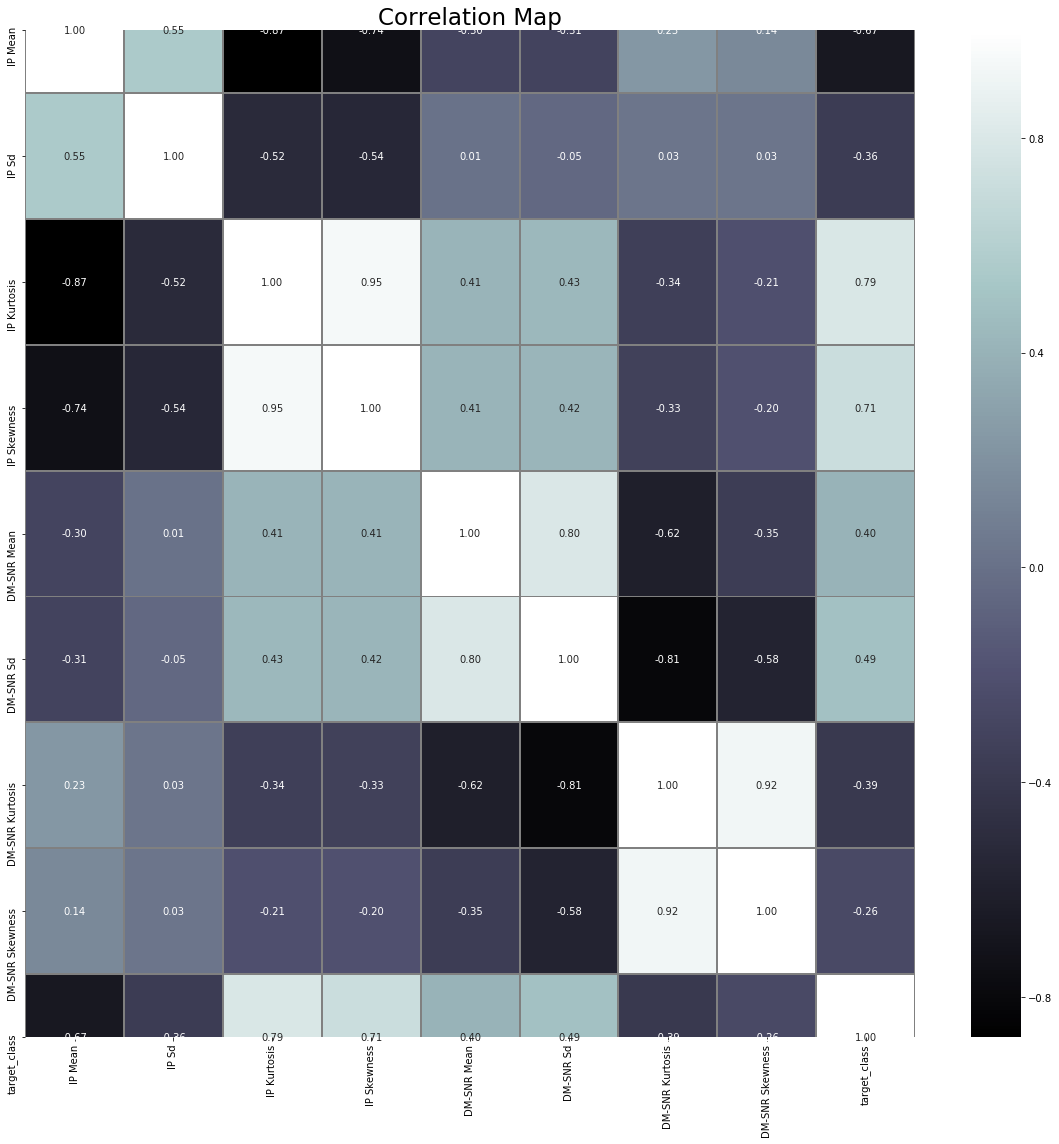

In [0]:
plt.figure(figsize=(16,16))
sns.heatmap(data=df.corr(),annot=True,cmap="bone",linewidths=1,fmt=".2f",linecolor="gray")
plt.title("Correlation Map",fontsize=23)
plt.tight_layout()
plt.show() 

Lets check if the dataset have any outliers

Text(0, 0.5, 'DM-SNR Skewness')

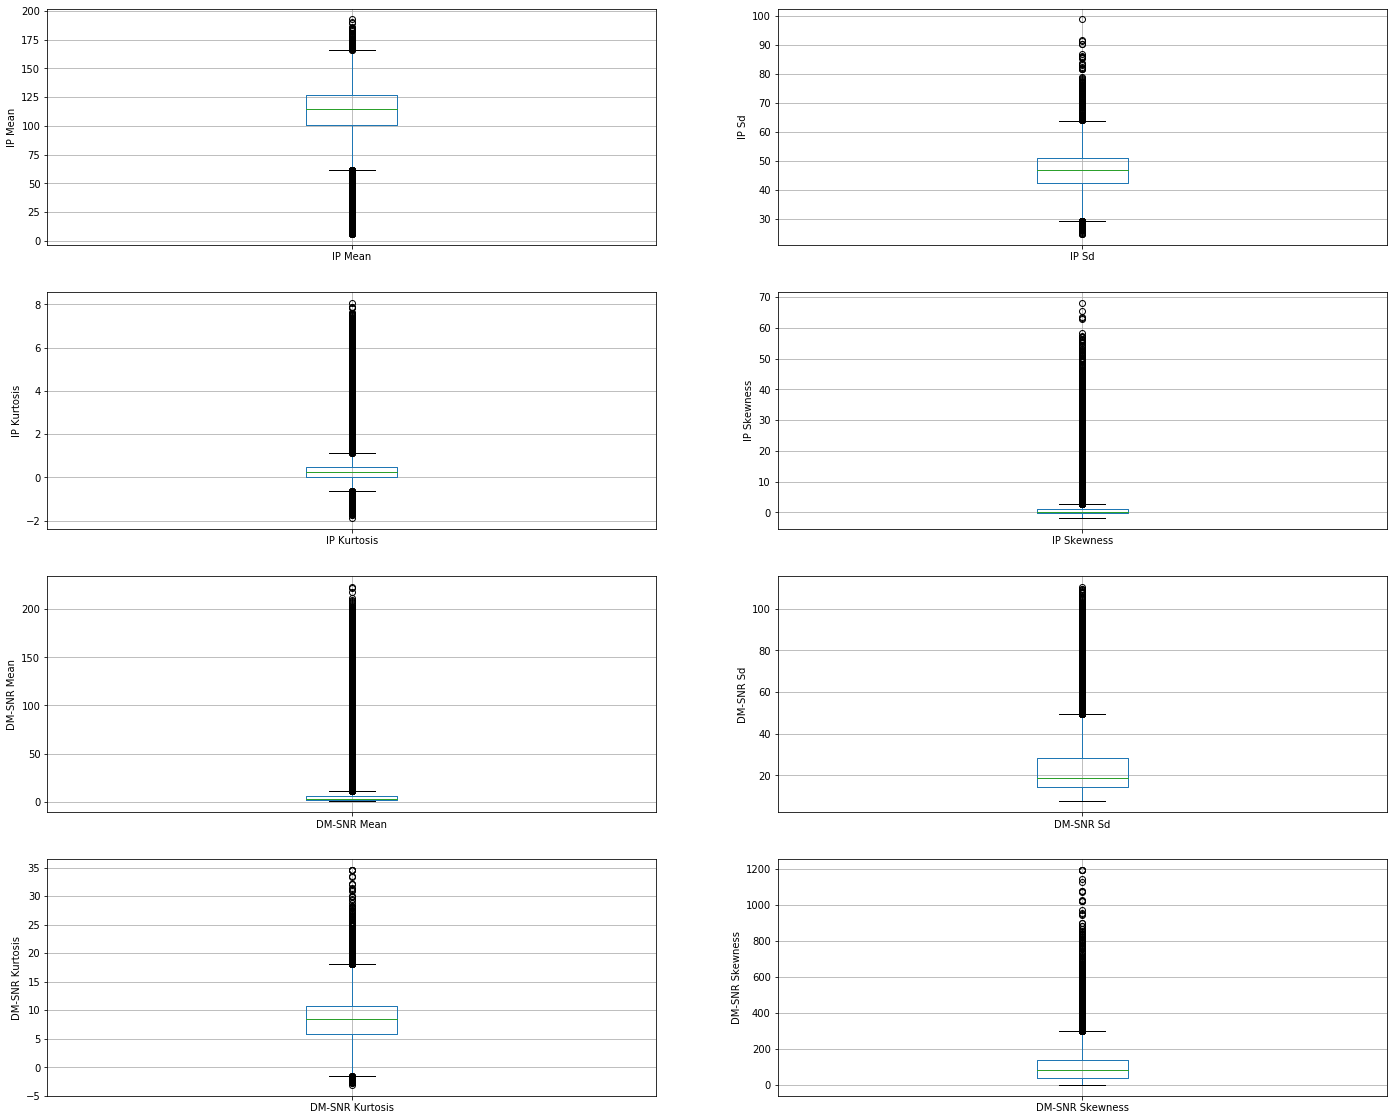

In [0]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

The above boxplots confirm that there are lot of outliers in these variables.

We will handle outliers with SVM



In [0]:
X = df.drop(['target_class'], axis=1)

y = df['target_class']

# 4. Splitting data into separate training and test set 

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
X_train.shape, X_test.shape

((14318, 8), (3580, 8))

# 5. Feature Scaling

In [0]:
cols = X_train.columns

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [0]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [0]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,1.986604e-16,-6.757488e-16,2.125527e-17,3.581784e-17,-2.205248e-17,-1.583840e-16,-9.700300e-18,1.214786e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.035499e+00,-3.181033e+00,-2.185946e+00,-5.744051e-01,-4.239001e-01,-9.733707e-01,-2.455649e+00,-1.003411e+00
25%,-3.896291e-01,-6.069473e-01,-4.256221e-01,-3.188054e-01,-3.664918e-01,-6.125457e-01,-5.641035e-01,-6.627590e-01
50%,1.587461e-01,5.846646e-02,-2.453172e-01,-2.578142e-01,-3.372294e-01,-4.067482e-01,3.170446e-02,-2.059136e-01
75%,6.267059e-01,6.501017e-01,-1.001238e-02,-1.419621e-01,-2.463724e-01,1.078934e-01,5.362759e-01,3.256217e-01
max,3.151882e+00,7.621116e+00,7.008906e+00,1.054430e+01,7.025568e+00,4.292181e+00,5.818557e+00,1.024613e+01


# 6. SVM

Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

In [0]:
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9827


# We have seen that there are outliers in our dataset. So, we should increase the value of C as higher C means fewer outliers. So, I will run SVM with kernel=rbf and C=100.0.

Run SVM with rbf kernel and C=100.0

In [0]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9832


Run SVM with linear kernel and C=100.0

In [0]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with linear kernel and C=100.0 : 0.9832


In [0]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9830


In [0]:
compareScore=[]
compareScore.append(0.9832*100)

Compare the train-set and test-set accuracy

In [0]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [0]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9783


In [0]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9783
Test set score: 0.9830


# 7. Confusion Matrix 

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])


Confusion matrix

 [[3289   17]
 [  44  230]]

True Positives(TP) =  3289

True Negatives(TN) =  230

False Positives(FP) =  17


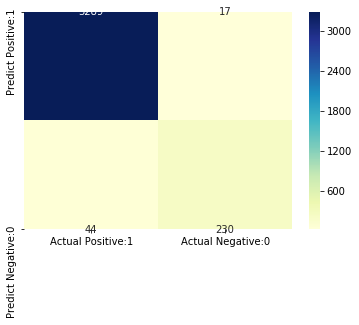

In [0]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

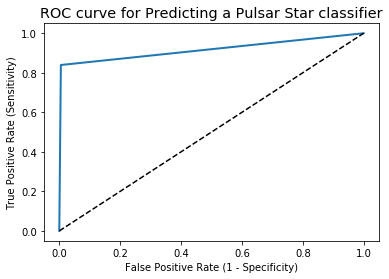

In [0]:

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# 8. KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)
print("Test accuracy: {}%".format(knn.score(X_test,y_test)*100))

Test accuracy: 98.43575418994413%


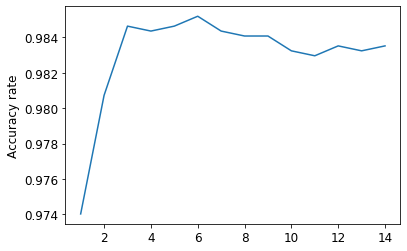

In [0]:
scoreList = []
n = 15
for i in range(1,n):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test,y_test))
    
plt.plot(range(1,n), scoreList)
plt.ylabel("Accuracy rate")
plt.show()

In [0]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)
print("Test accuracy: {}%".format(knn.score(X_test,y_test)*100))

Test accuracy: 98.5195530726257%


In [0]:
compareScore.append( 98.51)


# 9. Random Forest Classification

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=10)

rf.fit(X_train, y_train)

rfScore = rf.score(X_test, y_test)*100

print("Test accuracy: {}%".format(rfScore))

Test accuracy: 98.32402234636871%


In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=5)

rf.fit(X_train, y_train)

rfScore = rf.score(X_test, y_test)*100


print("Test accuracy: {}%".format(rfScore))


Test accuracy: 98.04469273743017%


In [0]:
compareScore.append(rfScore)

# 10. Model Comparision

In [0]:
compareScore

[98.32, 98.51, 98.04469273743017]

In [0]:
label = ['SVM', 'KNN', 'Random Forest']

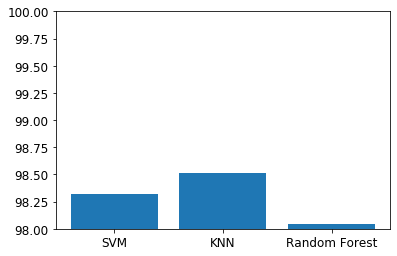

In [0]:
import math
x = label
y = compareScore
low = 98
high = 99
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
plt.bar(x,y) 
plt.show()

# 11.  Answers of the questions

# Is the relationship significant?

# Are any model assumptions violated?

Before starting to build on a predictive model, the following assumptions should be taken care off
Assumption 1: The parameters of the linear regression model must be numeric and linear in nature. 
If the parameters are non-numeric like categorical then use one-hot encoding (python) or dummy encoding (R) to convert them to numeric.

Assumption 2:The mean of residuals is zero

Assumption 3:Homoscedasticity of residuals or equal variance

Assumption 4
No perfect multicollinearity
There is no perfect linear relationship between explanatory variables.

#  Is there any multi-collinearity in the model?

Multicollinearity generally occurs when there are high correlations between two or more predictor variables. In other words, one predictor variable can be used to predict the other. This creates redundant information, skewing the results in a regression model. Examples of correlated predictor variables (also called multicollinear predictors) are: a person’s height and weight, age and sales price of a car, or years of education and annual income.

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [0]:
vif.round()

,VIF Factor,features
0,97.0,IP Mean
1,78.0,IP Sd
2,27.0,IP Kurtosis
3,16.0,IP Skewness
4,4.0,DM-SNR Mean
5,16.0,DM-SNR Sd
6,101.0,DM-SNR Kurtosis
7,27.0,DM-SNR Skewness


As expected, Excess kurtosis of the DM-SNR curve have a high variance inflation factor because they explain the same variance within this dataset. We would need to discard this variable before moving on to model building or risk building a model with high multicolinearity.

In [0]:
X = df.drop(['target_class'], axis=1)

y = df['target_class']

In [0]:
X = df.drop(['DM-SNR Kurtosis'], axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=5)

rf.fit(X_train, y_train)

rfScore = rf.score(X_test, y_test)*100


print("Test accuracy: {}%".format(rfScore))

Test accuracy: 100.0%


By dropping 'DM-SNR Kurtosis' column which had very high variance our accuracy increased

# Does the model make sense?

After performing hyperparameter tunning, all 3 models (SVM, KNN, and Random Forest) gave us an accuracy above 98%. We considered all the significant variables in order to calculate accuracy. 

# Which independent variables are significant? and In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model ?

If your p-value is less than or equal to the set significance level, the data is considered statistically significant. As a general rule, the significance level (or alpha) is commonly set to 0.05, meaning that the probability of observing the differences seen in your data by chance is just 5%.

# Which hyperparameters are important?

1. SVM: For Support Vector Machine value of C and type of kernal are the important hyperparameters
2. KNN: For KNN number of nearest neighbors are important
3. RF: For Random Forest n_estimators is the important hyperparameter

# 12. Conclusion

Preprocessed the given data, checked if the data set have any missing values. There were outliners in the data sets so, as I increase the value of C to limit fewer outliers, the accuracy increased. This is true with different kinds of kernels. I built 3 models and calculated the accuracy for each of them. Compared to the accuracies and the best accuracy we got was 98.51% using the KNN algorithm. Later, checked for the multicollinearity, we found that column 'DM-SNR Kurtosis' had the highest variance. After dropping the column we got 100% accuracy.

# 13. Citations

1 https://www.kaggle.com/prashant111/svm-classifier-in-python
2 https://www.statsmodels.org/dev/diagnostic.html
3 https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0
4 https://en.wikipedia.org/wiki/Support-vector_machine
5 https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
    

# 14. License

Copyright 2020 Tejaswini Talekar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE
